# Influence of Booking Parameters on AirBnB Prices


## The following section will analyze different booking factors and their influence on NYC AirBnB prices.

### Parameters to be investigated:
1. Review Rating
2. Host Verification
3. Cancellation Policy
4. Construction Year
5. Room Type

In [1]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import cleaned_airbnb_data.csv
filepath = Path("Resources\cleaned_airbnb_data.csv")
airbnb_df = pd.read_csv(filepath)

In [3]:
airbnb_df_sl = airbnb_df
# Changing Review Rate Number to integer
airbnb_df_sl = airbnb_df_sl.astype({'review rate number': "int64"})
# change 'Construction year' from float to int
airbnb_df_sl = airbnb_df_sl.astype({'Construction year': "int64"})

In [4]:
# Defining a function to create a boxplot and summary statistics DataFrame based on two columns
def makebp_sl(x,y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    num_sl = len(categories_sorted_sl)
    
    # Setting up empty lists for summary statistics
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data_sl
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[airbnb_df_sl[x] == categories_sorted_sl[z], [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl= 0
            maxi_sl= 0
        
        # Adding the summary statistics into lists
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting the boxplots
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

In [5]:
# Defining a function to create a boxplot and summary statistics DataFrame based on three columns and one variable
def makebp_4var_sl(t, u, v, w, x, y):
    # Setting up an empty list that will hold the loc data
    bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
    categories_sl = airbnb_df_sl[x].unique()
    categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
    num_sl = len(categories_sorted_sl)
    length_list_sl = []
    median_list_sl = []
    mean_list_sl = []
    min_list_sl = []
    max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
    for z in range(num_sl):
        category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl[x] == categories_sorted_sl[z]) & 
                                            (airbnb_df_sl[v] == w) &
                                            (airbnb_df_sl[t] == u), [y]]
        bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
        length_sl = int(bp_data_sl[z].count())
        length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
        if length_sl > 0:
            median_sl = int(bp_data_sl[z].median())    
            mean_sl = int(bp_data_sl[z].mean())
            mini_sl = int(bp_data_sl[z].min())
            maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
        else:
            median_sl = 0
            mean_sl = 0
            mini_sl=0
            maxi_sl=0
            
        # Adding the summary statistics into lists    
        median_list_sl.append(median_sl)
        mean_list_sl.append(mean_sl)
        min_list_sl.append(mini_sl)
        max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
    summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
    summary_df_sl.index = [categories_sorted_sl]
    summary_df_sl = summary_df_sl.rename_axis(x)
    display(summary_df_sl)
    
    # Plotting boxplot
    j=1
    for k in range(num_sl):
        y_val_sl = bp_data_sl[k]
        plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        
        #Set position for next boxplot
        j=j+1
    plt.ylabel(y)
    plt.xlabel(x)
    x_axis = np.arange(1,(num_sl+1),1)
    plt.xticks(x_axis, categories_sorted_sl)
    plt.show

    

### Price by Review Rating  
AirBnB property ratings are an effective tool to determine the likeliness of a pleasant AirBnB stay. Boxplots were constructed to help visualize if "Price" changes depending on the "Rating" of a property.  
Question: Are better rated properties more expensive in general?  
Conclusion: The boxplots show no obvious relationship between "Ratings" and "Price". Ratings and Price would be a difficult relationship to define. Ratings are based on expectations and expectations can be based on price. You may have higher expectations on a expensive property, therefore be more critical in the ratings.

,Property Count,Median,Mean,Minimum,Maximum
review rate number,,,,,
1,7019,637,631,50,1200
2,18684,632,629,50,1200
3,18794,628,625,50,1200
4,18817,625,626,50,1200
5,18792,618,622,50,1200


Text(0.5, 1.0, 'Whole Dataset')

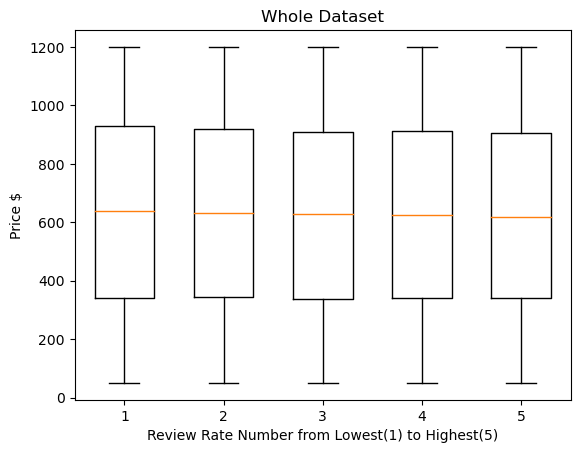

In [6]:
# Price by Review Rating

# Defining the Variables
x = 'review rate number'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Review Rate Number from Lowest(1) to Highest(5)")
plt.title("Whole Dataset")

## Utilizing Static Rating and Location Parameters

When booking an AirBnB, everyone wants to have a decent stay for a reasonable price.  
The following set of figures will show two figures per variable of interest:
1. Price based on variable 'x'
2. Price based on variable 'x' plus a "Rating" of 5 and in "Manhattan".  
Manhattan was chosen because it is a very popular borough for travel, and a 5 rating would be the most ideal rating.

### Price by Host Verification  
Host verification helps provides an initial level of trust in a host's listing. Currently policy is that all hosts and guests are verified, but this dataset must have been acquired prior to this policy implementation. There is an approximate 50/50 split of verified and unconfirmed in this dataset.  
Question: Do properties with verified Hosts charge more than unverified hosts?  
Conclusion: Both sets of Boxplots show no obvious relationship between "Host Verification" and "Price".

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,41062,627,627,50,1200
verified,41044,625,626,50,1200


Text(0.5, 1.0, 'Whole Dataset')

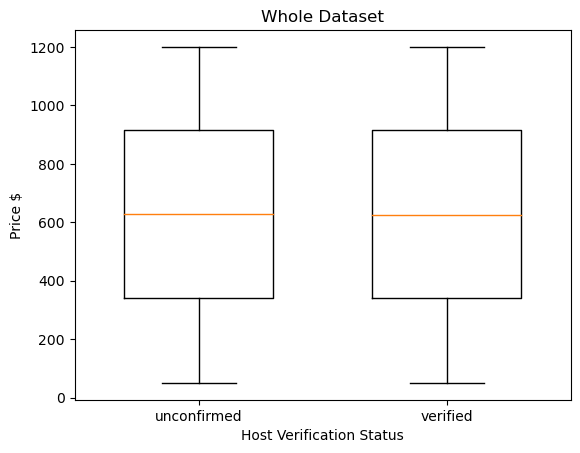

In [7]:
# Price by Host Verification

# Defining the Variables
x = 'host_identity_verified'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Whole Dataset")

,Property Count,Median,Mean,Minimum,Maximum
host_identity_verified,,,,,
unconfirmed,3834,614,617,50,1200
verified,3954,595,608,50,1199


Text(0.5, 1.0, 'Top Rated Properties in Manhattan')

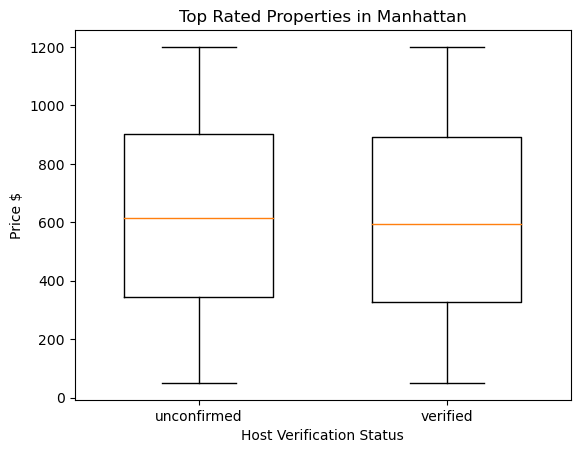

In [8]:
# Top Rated Properties - Price by Host Verification in Manhattan

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "host_identity_verified"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function 
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Host Verification Status")
plt.title("Top Rated Properties in Manhattan")

### Price by Cancellation Policy, for Whole Dataset and Top Rated Properties
AirBnB provides a range of cancellation policies from strict to flexible. A host may desire the security of a more strict policy, whereas a guest may prefer a more flexible cancellation policy to allow sudden vacation changes.   
Question: Do prices change with a more strict cancellation policy?  
Conclusion: Both sets of boxplots show no obvious change in price due to cancellation policy.

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,27291,629,628,50,1200
moderate,27479,622,625,50,1200
strict,27336,628,626,50,1200


Text(0.5, 1.0, 'Whole Dataset')

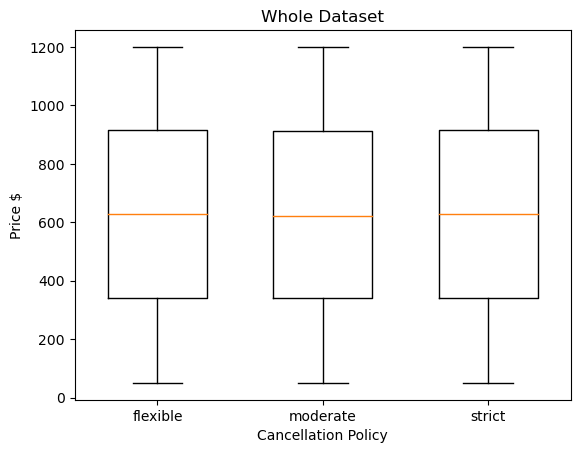

In [9]:
# Price by Cancellation Policy

# Defining the Variables
x = 'cancellation_policy'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Whole Dataset")

,Property Count,Median,Mean,Minimum,Maximum
cancellation_policy,,,,,
flexible,2556,608,609,50,1197
moderate,2632,614,625,50,1200
strict,2600,590,603,50,1199


Text(0.5, 1.0, 'Top Rated in Manhattan')

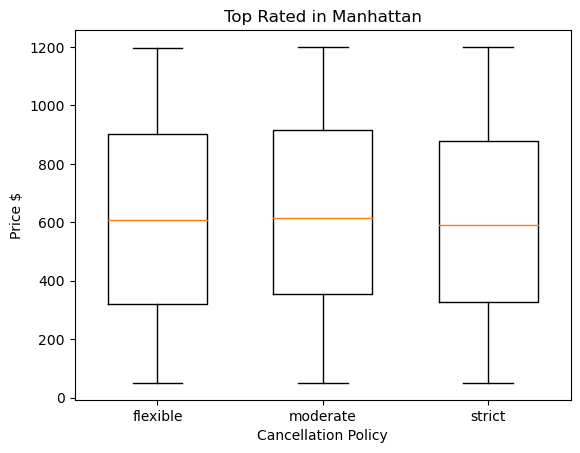

In [10]:
# Top Rated Properties - Price by Cancellation Policy in Manhattan

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "cancellation_policy"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Cancellation Policy")
plt.title("Top Rated in Manhattan")

### Price by Construction Year
Question: Do newer builds charge more for AirBnB rentals?  
Observing the first plot, there is no obvious difference in medians between construction years when using the whole dataset.  In the second graph when the data is only for 5-Rated Manhattan properties, there is some variation in median price between the years, but no trend is visible.  
Conclusion: Newer builds do not charge more for AirBnB rentals.

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,4095,626,623,50,1200
2004,4035,643,633,50,1199
2005,4103,626,623,50,1200
2006,4208,630,630,50,1199
2007,4074,633,630,50,1200
2008,4218,638,639,50,1200
2009,4120,627,622,50,1200
2010,4120,615,620,50,1200
2011,4064,632,634,50,1200


Text(0.5, 1.0, 'Whole Dataset')

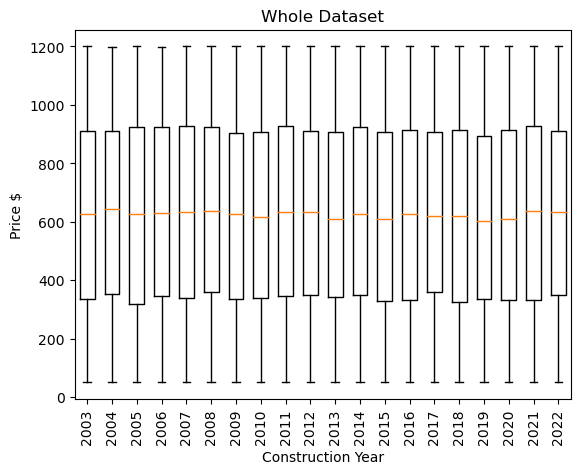

In [11]:
# Price by Construction Year

# Defining the Variables
x = 'Construction year'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Whole Dataset")

,Property Count,Median,Mean,Minimum,Maximum
Construction year,,,,,
2003,401,540,581,57,1189
2004,412,622,629,55,1194
2005,370,574,595,52,1197
2006,415,605,617,52,1198
2007,388,594,598,50,1196
2008,416,679,635,57,1196
2009,359,621,619,57,1194
2010,398,578,598,62,1196
2011,431,617,627,57,1192


Text(0.5, 1.0, 'Top Rated in Manhattan')

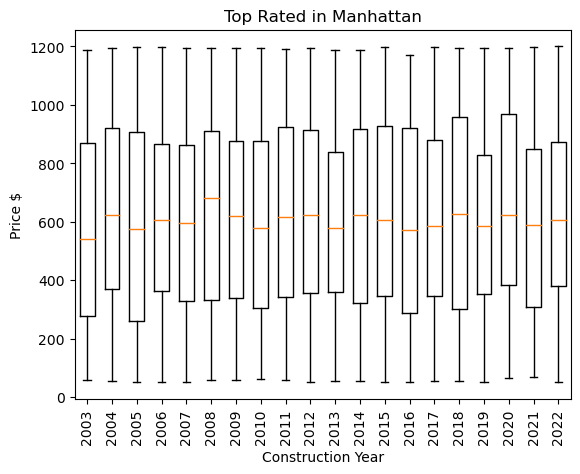

In [12]:
# Top Rated - Price by Construction Year

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "Construction year"
y = "price"

# Making Summary Statistics Table and BoxPlots utilizing makebp_4var_sl function
makebp_4var_sl(t,u,v,w,x,y)
plt.ylabel("Price $")
plt.xlabel("Construction Year")
plt.xticks(rotation=90)
plt.title("Top Rated in Manhattan")

### Price by Room Type   
Question: Do different room types typically charge more for their property? 
When considering the whole dataset, there is little difference in medians across all room types.  After analyzing only 5-rated Manhattan properties there appears to be an increase in median price of hotel rooms compared to the other room types. This difference was statistically analyzed with a Welch's t-test.  
Null Hypothesis: The mean price of "Entire Home" is equal to mean of "Hotel Room".  
With a p-value of 0.1, we fail to reject the null hypothesis.  
Conclusion: There is not a statistically significant difference on price by room type.

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,43335,625,625,50,1200
Hotel room,113,643,668,50,1193
Private room,37023,626,627,50,1200
Shared room,1635,656,629,50,1199


Text(0.5, 1.0, 'Whole Dataset')

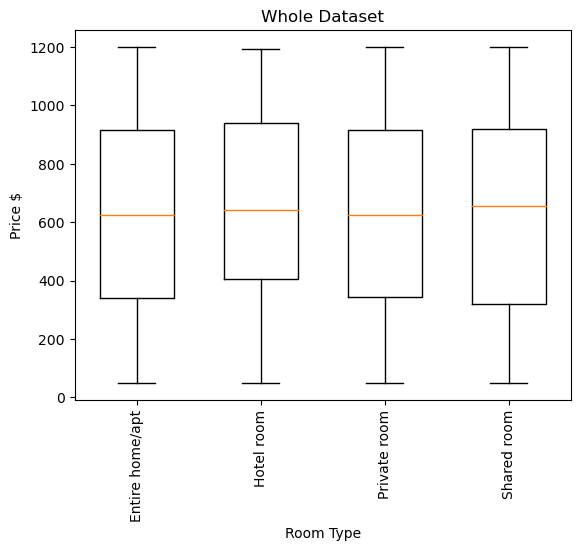

In [13]:
# Price by Room Type

# Defining the Variables
x = 'room type'
y = 'price'

# Making Summary Statistics Table and BoxPlots utilizing makebp_sl function
makebp_sl(x,y)
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.title("Whole Dataset")

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,4640,598,611,50,1200
Hotel room,27,703,694,286,1149
Private room,2980,618,613,50,1199
Shared room,141,624,616,51,1194


Text(0.5, 1.0, 'Top Rated in Manhattan')

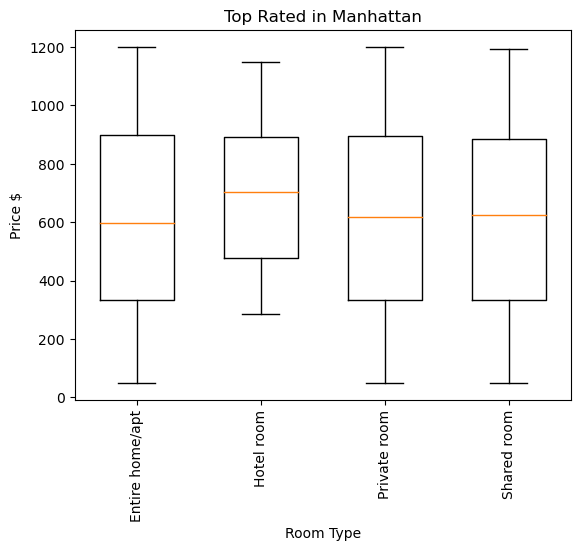

In [14]:
# Top Rated - Price by Room Type

# Defining the Variables
t= "neighbourhood group"
u = "Manhattan"
v = "review rate number"
w = 5
x = "room type"
y = "price"
# Making Summary Statistics Table and BoxPlots 
# Setting up an empty list that will hold the loc data
bp_data_sl = []
    

# Defining what values will be used to define the boxplot on x-axis
categories_sl = airbnb_df_sl[x].unique()
categories_sorted_sl = np.sort(categories_sl)
    
# Setting up empty lists for summary statistics
num_sl = len(categories_sorted_sl)
length_list_sl = []
median_list_sl = []
mean_list_sl = []
min_list_sl = []
max_list_sl = []
    
# Finding the data according to x and y variables, and appending to bp_data
for z in range(num_sl):
    category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl[x] == categories_sorted_sl[z]) & 
                                        (airbnb_df_sl[v] == w) &
                                        (airbnb_df_sl[t] == u), [y]]
    bp_data_sl.append(category_data_sl)
        
    # Determining how many values per x-axis category
    length_sl = int(bp_data_sl[z].count())
    length_list_sl.append(length_sl)
        
    # If there are found values, they will be used for summary statistics calculations
    if length_sl > 0:
        median_sl = int(bp_data_sl[z].median())    
        mean_sl = int(bp_data_sl[z].mean())
        mini_sl = int(bp_data_sl[z].min())
        maxi_sl = int(bp_data_sl[z].max())
        
    # If there are no values for the category, statistics will be set to 0
    else:
        median_sl = 0
        mean_sl = 0
        mini_sl=0
        maxi_sl=0
            
    # Adding the summary statistics into lists    
    median_list_sl.append(median_sl)
    mean_list_sl.append(mean_sl)
    min_list_sl.append(mini_sl)
    max_list_sl.append(maxi_sl)
    
# Making summary statistics DataFrame and setting index label    
summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                            "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
summary_df_sl.index = [categories_sorted_sl]
summary_df_sl = summary_df_sl.rename_axis(x)
display(summary_df_sl)
    
# Plotting boxplot
j=1
for k in range(num_sl):
    y_val_sl = bp_data_sl[k]
    plt.boxplot(y_val_sl, positions=[j], widths=0.6)
        
    #Set position for next boxplot
    j=j+1
x_axis = np.arange(1,(num_sl+1),1)
plt.xticks(x_axis, categories_sorted_sl)
plt.show
plt.ylabel("Price $")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.title("Top Rated in Manhattan")



In [15]:
# confirming normal distribution before t-test with Shapiro method
# Null Hypothesis: no difference between sample distribution and a normal distribution

from scipy.stats import shapiro
from scipy.stats import kstest

entire_home_sl = bp_data_sl[0]['price'].tolist()
hotel_room_sl = bp_data_sl[1]['price'].tolist()

print(f'Entire Home normal distribution testing = {shapiro(hotel_room_sl)}')
print(f'Hotel Room normal distribution testing = {shapiro(hotel_room_sl)}')


Entire Home normal distribution testing = ShapiroResult(statistic=0.9515431523323059, pvalue=0.2336476892232895)
Hotel Room normal distribution testing = ShapiroResult(statistic=0.9515431523323059, pvalue=0.2336476892232895)


In [16]:
# Welch's t-test comparing mean of entire home vs hotel room
stats.ttest_ind(entire_home_sl, hotel_room_sl, equal_var = False)

TtestResult(statistic=-1.6602215842611618, pvalue=0.10866502497961428, df=26.48602504427676)

## Price by Room Type - Further Exploration

When observing the figures utilizing the whole dataset, it was difficult to see significant differences in prices due to the various listing factors (eg. rating, host verification, cancellation policy, construction year, room type). Median price remained consistent across all factors, and price ranges also remain comparable.  Interestingly, when analyzing room types for only 5-rated Manhattan properties the boxplots began to shift.  The aim of this section is to hold additional parameters constant, to help single out parameters and observe their effect on price.
The following graphs will include properties with the following fixed parameters:
* Neighbourhood Group = Manhattan
* Rating = 5 or 1
* Cancellation policy = flexible and moderate
* Verified hosts
* Greater than 1 review
Factors were defined to reflect the most desireable parameters for a guest looking to book.  
Two plots were produced, one representing only 5-rated properties, and the second displays only 1-rated properties.  A scatter plot overlay was utilized to visualize sample sizes between property types.
### Statistical Analysis
Welch's t-test was utilized to determine if there were any signficant differences in price between room types within the same Rating, and differences in price between the same room types but different ratings.
Normality testing was first conducted to ensure the sample sets can be used with the Welch's t-test.
The Null Hypothesis was not rejected for any of the sample sets compared.  A p-value of 0.506 was obtained when comparing the prices of "Entire Home" room type between the Best and Lowest Rated sample groups.  This indicates a weakly potential, albeit statistically insignificant effect of Rating on Price for Entire Homes.  

### Best Rated (Rating = 5) Properties with Defined Parameters

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,1365,590,614,50,1198
Hotel room,5,643,581,317,753
Private room,851,618,616,52,1196
Shared room,48,562,563,51,1136


<function matplotlib.pyplot.show(close=None, block=None)>

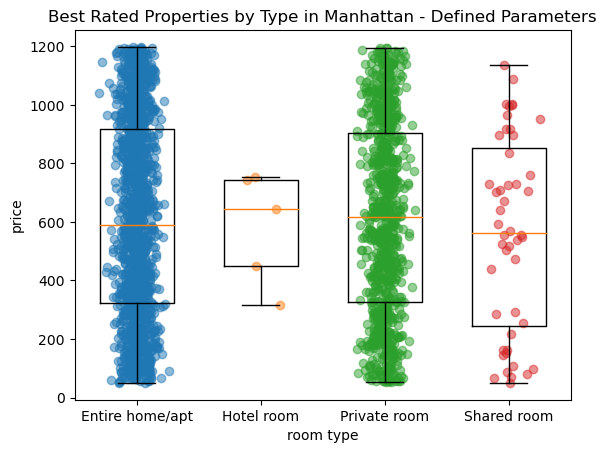

In [17]:
# Rating of 5
# Price by room type (verified host, flexible or moderate cancellation policy, 5-rating, number of reviews >1, Manhattan)
# Creating a boxplot and summary statistics DataFrame based on three columns and one variable with added Scatter plot
    
# Setting up an empty list that will hold the loc data
bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
categories_sl = airbnb_df_sl["room type"].unique()
categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
num_sl = len(categories_sorted_sl)
length_list_sl = []
median_list_sl = []
mean_list_sl = []
min_list_sl = []
max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
for z in range(num_sl):
    category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl["room type"] == categories_sorted_sl[z]) & 
                                        (airbnb_df_sl["host_identity_verified"] == "verified") &
                                        ((airbnb_df_sl["cancellation_policy"] == "flexible")| 
                                        (airbnb_df_sl["cancellation_policy"] == "moderate"))&
                                        (airbnb_df_sl["review rate number"] == 5) &
                                        (airbnb_df_sl['number of reviews'] > 1) &
                                        (airbnb_df_sl['neighbourhood group'] == "Manhattan"),['price']]
    bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
    length_sl = int(bp_data_sl[z].count())
    length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
    if length_sl > 0:
        median_sl = int(bp_data_sl[z].median())    
        mean_sl = int(bp_data_sl[z].mean())
        mini_sl = int(bp_data_sl[z].min())
        maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
    else:
        median_sl = 0
        mean_sl = 0
        mini_sl=0
        maxi_sl=0
            
        # Adding the summary statistics into lists    
    median_list_sl.append(median_sl)
    mean_list_sl.append(mean_sl)
    min_list_sl.append(mini_sl)
    max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
summary_df_sl.index = [categories_sorted_sl]
summary_df_sl = summary_df_sl.rename_axis('room type')
display(summary_df_sl)
    
    # Plotting boxplot and scatter
j=1
for k in range(num_sl):
    y_val_sl = bp_data_sl[k]
        
        # Setting variable for scatter plot overlay
    x_val_sl = np.random.normal(k + 1, 0.08, len(y_val_sl))
        
        # Making boxplots with scatter overlay
    plt.boxplot(y_val_sl, positions=[j], widths=0.6)
    plt.scatter(x_val_sl,y_val_sl, alpha=0.5)
        
        #Sets position for next boxplot
    j=j+1
plt.ylabel("price")
plt.xlabel("room type")
x_axis = np.arange(1,(num_sl+1),1)
plt.xticks(x_axis, categories_sorted_sl)
plt.title("Best Rated Properties by Type in Manhattan - Defined Parameters")
plt.show


In [18]:
best_entirehome = bp_data_sl[0]['price'].tolist()
best_hotel = bp_data_sl[1]['price'].tolist()
best_private = bp_data_sl[2]['price'].tolist()
best_shared = bp_data_sl[3]['price'].tolist()

print(f'Entire Home normal distribution testing = {shapiro(best_entirehome)}')
print(f'Hotel Room normal distribution testing = {shapiro(best_hotel)}')
print(f'Private Room normal distribution testing = {shapiro(best_private)}')
print(f'Shared Room normal distribution testing = {shapiro(best_shared)}')

Entire Home normal distribution testing = ShapiroResult(statistic=0.9483581781387329, pvalue=1.776056133760085e-21)
Hotel Room normal distribution testing = ShapiroResult(statistic=0.8865546584129333, pvalue=0.34007528424263)
Private Room normal distribution testing = ShapiroResult(statistic=0.9554901719093323, pvalue=2.214043115443781e-15)
Shared Room normal distribution testing = ShapiroResult(statistic=0.9337468147277832, pvalue=0.00939561054110527)


Normal Distribution testing revealed a normal distribution for only Entire Home and Private Room.

In [19]:
# Welch's t-test
# Null Hypothesis: Mean of Entire home is equal to the mean of Private room (Best Rated)
stats.ttest_ind(best_entirehome, best_private, equal_var = False)

TtestResult(statistic=-0.15915050188535196, pvalue=0.8735678585263562, df=1830.3945225156813)

#### Entire Home vs Private Room: Price in Best Rated
With a p-value of 0.87, we cannot reject the Null Hypothesis.

### Lowest Rated (Rating = 1) Properties with Defined Parameters

,Property Count,Median,Mean,Minimum,Maximum
room type,,,,,
Entire home/apt,506,651,648,50,1200
Hotel room,0,0,0,0,0
Private room,322,593,615,55,1195
Shared room,13,886,840,164,1199


<function matplotlib.pyplot.show(close=None, block=None)>

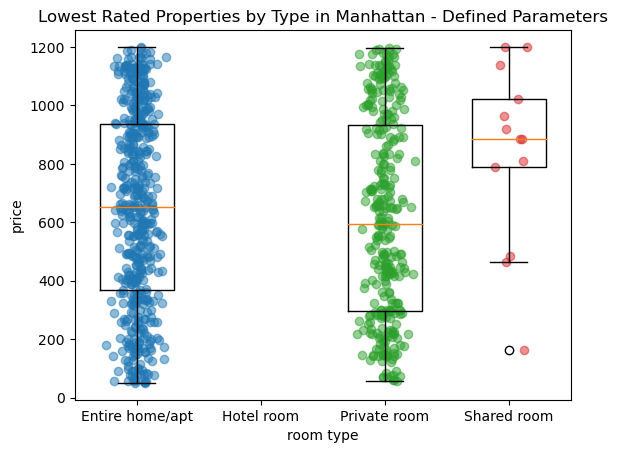

In [20]:
# Rating of 1
# Price by room type (verified host, flexible or moderate cancellation policy, 1-rating, number of reviews >1, Manhattan)
# Creating a boxplot and summary statistics DataFrame based on three columns and one variable with added Scatter plot

bp_data_sl = []
    
    # Defining what values will be used to define the boxplot on x-axis
categories_sl = airbnb_df_sl["room type"].unique()
categories_sorted_sl = np.sort(categories_sl)
    
    # Setting up empty lists for summary statistics
num_sl = len(categories_sorted_sl)
length_list_sl = []
median_list_sl = []
mean_list_sl = []
min_list_sl = []
max_list_sl = []
    
    # Finding the data according to x and y variables, and appending to bp_data
for z in range(num_sl):
    category_data_sl = airbnb_df_sl.loc[(airbnb_df_sl["room type"] == categories_sorted_sl[z]) & 
                                        (airbnb_df_sl["host_identity_verified"] == "verified") &
                                        ((airbnb_df_sl["cancellation_policy"] == "flexible") |
                                        (airbnb_df_sl["cancellation_policy"] == "moderate")) &
                                        (airbnb_df_sl["review rate number"] == 1) &
                                        (airbnb_df_sl['number of reviews'] > 1) &
                                        (airbnb_df_sl['neighbourhood group'] == "Manhattan"),['price']]
    bp_data_sl.append(category_data_sl)
        
        # Determining how many values per x-axis category
    length_sl = int(bp_data_sl[z].count())
    length_list_sl.append(length_sl)
        
        # If there are found values, they will be used for summary statistics calculations
    if length_sl > 0:
        median_sl = int(bp_data_sl[z].median())    
        mean_sl = int(bp_data_sl[z].mean())
        mini_sl = int(bp_data_sl[z].min())
        maxi_sl = int(bp_data_sl[z].max())
        
        # If there are no values for the category, statistics will be set to 0
    else:
        median_sl = 0
        mean_sl = 0
        mini_sl=0
        maxi_sl=0
            
        # Adding the summary statistics into lists    
    median_list_sl.append(median_sl)
    mean_list_sl.append(mean_sl)
    min_list_sl.append(mini_sl)
    max_list_sl.append(maxi_sl)
    
    # Making summary statistics DataFrame and setting index label    
summary_df_sl = pd.DataFrame({"Property Count":length_list_sl, "Median": median_list_sl, 
                               "Mean":mean_list_sl, "Minimum":min_list_sl, "Maximum":max_list_sl})
summary_df_sl.index = [categories_sorted_sl]
summary_df_sl = summary_df_sl.rename_axis('room type')
display(summary_df_sl)
    
    # Plotting boxplot and scatter
j=1
for k in range(num_sl):
    y_val_sl = bp_data_sl[k]
        
        # Setting variable for scatter plot overlay
    x_val_sl = np.random.normal(k + 1, 0.08, len(y_val_sl))
        
        # Making boxplots with scatter overlay
    plt.boxplot(y_val_sl, positions=[j], widths=0.6)
    plt.scatter(x_val_sl,y_val_sl, alpha=0.5)
        
        #Sets position for next boxplot
    j=j+1
plt.ylabel("price")
plt.xlabel("room type")
x_axis = np.arange(1,(num_sl+1),1)
plt.xticks(x_axis, categories_sorted_sl)
plt.title("Lowest Rated Properties by Type in Manhattan - Defined Parameters")
plt.show

In [21]:
worst_entirehome = bp_data_sl[0]['price'].tolist()
worst_private = bp_data_sl[2]['price'].tolist()
worst_shared = bp_data_sl[3]['price'].tolist()

print(f'Entire Home normal distribution testing = {shapiro(worst_entirehome)}')
print(f'Private Room normal distribution testing = {shapiro(worst_private)}')
print(f'Shared Room normal distribution testing = {shapiro(worst_shared)}')

Entire Home normal distribution testing = ShapiroResult(statistic=0.9534406661987305, pvalue=1.5371063796787432e-11)
Private Room normal distribution testing = ShapiroResult(statistic=0.9399306774139404, pvalue=3.819375926639168e-10)
Shared Room normal distribution testing = ShapiroResult(statistic=0.9087918400764465, pvalue=0.1765323281288147)


Normal Distribution testing revealed a normal distribution for only Entire Home and Private Room. Hotel room was omitted for calcluations because there were no values.

In [22]:
# Welch's t-test
# Null Hypothesis: Mean of Entire home is equal to the mean of Private room (worst rated).
stats.ttest_ind(worst_entirehome, worst_private, equal_var = False)


TtestResult(statistic=1.3407629742145784, pvalue=0.18045382670117097, df=667.0422318160678)

#### Entire Home vs Private Room: Price in Lowest Rated
With a p-value of 0.18, we cannot reject the Null Hypothesis.

### A final statistical comparison of Best rated vs Worst rated.  Can we observe a relationship of Price based on rating?

In [23]:
# Welch's t-test
# Null Hypothesis: Mean of Best Rated Entire Homes is equal to the mean of Worst Rated Entire Homes.
print(f'Best rated:{stats.ttest_ind(best_entirehome, worst_entirehome, equal_var = False)}')

# Null Hypothesis: Mean of Best Rated Private Room is equal to the mean of Worst Rated Private Room.
print(f'Worst rated:{stats.ttest_ind(best_private, worst_private, equal_var = False)}')

Best rated:TtestResult(statistic=-1.9569158324955611, pvalue=0.050661653685339626, df=913.4374181086276)
Worst rated:TtestResult(statistic=0.034090149880109735, pvalue=0.9728174345905765, df=558.8852228390843)


#### Best Rated vs Lowest Rated: Entire Home Price
With a p-value of 0.0506, I was unable to reject the Null Hypothesis that the means are different between the two groups.  With a 0.05 confidence level, the observed p-value may indicate a very weak effect of price based on rating, but there is still a 5.1% chance that the observed price change is by chance.



#### Best Rated vs Lowest Rated: Private Room Price
With a p-value of 0.9, I was unable to reject the Null Hypothesis that the means are different between the two groups.

# Statistical Analysis of "Service Fee"

### Linear Regression Model on "Service Fee" based on "Price"
The dataset did not have a clear description on how the "Service Fee" column was populated. AirBnB states a base service fee up to ~14%, with additional fees defined by the property owner.  A linear regression model was used to determine the relationship between "Price" and "Service Fee".  
Question: How does the Service Fee change with Price?   
Scatter plot showed a linear relationship.  It appears that the Service Fee may have been estimated by the individual assembling the dataset.  
Conclusion: The service fee is equal to 20% of the price. 

In [24]:
# remove rows with service fee at zero because those would be invalid
airbnb_df_sl2 = airbnb_df_sl.loc[airbnb_df_sl['service fee'] >0,:]
airbnb_df_sl2.reset_index(drop=True)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81901,57358028,"Room in Queens, NY, near LGA.",56457739998,verified,Sonia,Queens,East Elmhurst,40.76245,-73.87938,United States,...,196.0,1.0,239.0,2019-06-29,8.58,2,2.0,361.0,1. Please clean-up after yourself in the kitch...,NaN
81902,57358580,Cozy home away from home,60176837202,verified,NaN,Queens,Edgemere,40.59380,-73.77373,United States,...,189.0,1.0,76.0,2019-06-27,2.84,1,1.0,324.0,NaN,NaN
81903,57359133,Central Park Views - Private Room & Bathroom,68411243647,verified,NaN,Manhattan,Upper West Side,40.79712,-73.96117,United States,...,141.0,1.0,4.0,2017-08-15,0.14,4,1.0,0.0,My roommates and I take a lot of pride in keep...,NaN
81904,57359685,Ultimate 50th Floor Downtown Penthouse - 4000...,95625271612,verified,NaN,Manhattan,SoHo,40.72318,-74.00223,United States,...,209.0,2.0,21.0,2019-07-01,0.74,4,2.0,343.0,#NAME?,NaN


In [25]:
# Defining a linear regression function and scatter plot

def lin_reg_sl(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

The r-value is: 0.9999908975794347


Text(0.5, 1.0, 'Service Fee vs Price')

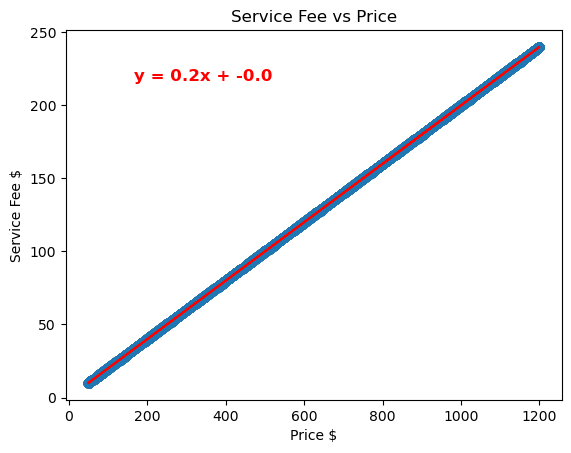

In [26]:
# Service fee by Price Scatter Plot

# Defining the Variables
x = airbnb_df_sl2["price"]
y = airbnb_df_sl2['service fee']

# Scatter plot and linear regression
lin_reg_sl(x,y)
plt.xlabel("Price $")
plt.ylabel("Service Fee $")
plt.title("Service Fee vs Price")

# Whole Population Data Overview

## Count of Properties by Neighbourhood Group
Question: How are the properties distributed within each neighbourhood group (borough)?   
Conclusion: The most properties are within Brooklyn and Manhattan.  

Text(0.5, 1.0, 'Property Distribution in AirBnB Dataset')

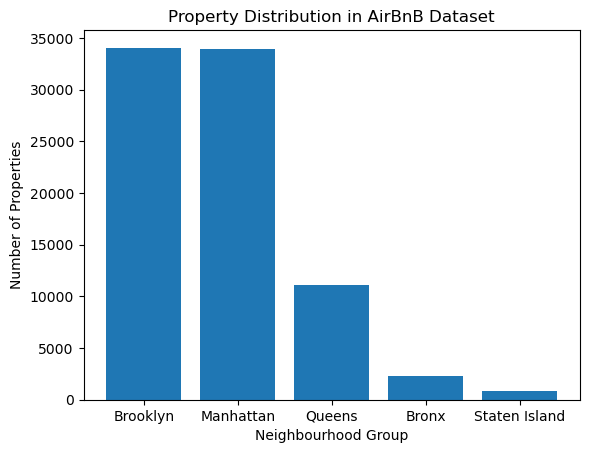

In [27]:
# Count of Number of Properties in Each Neighbourhood Group
neighbour_group_df_sl = airbnb_df_sl.groupby(['neighbourhood group'])
neighbour_gr_bar_data = neighbour_group_df_sl["price"].count()
neighbour_gr_bar_data = neighbour_gr_bar_data.sort_values(ascending=False)

x = neighbour_gr_bar_data.index.to_list()
y = neighbour_gr_bar_data.to_list()
plt.bar(x,y)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Properties")
plt.title("Property Distribution in AirBnB Dataset")

## Count by Cancellation Policy
Question: How are the cancellation policies distributed?   
Conclusion: Each cancellation policy is almost equally represented in this dataset.    

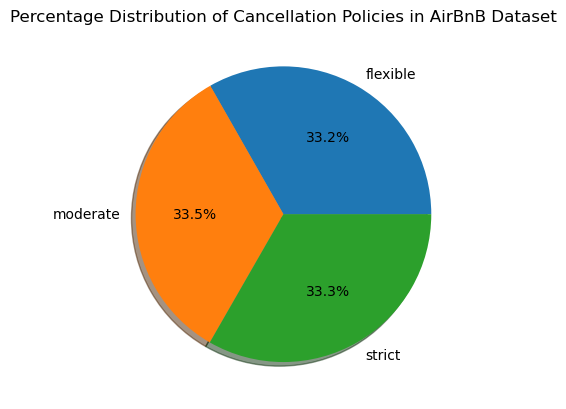

In [28]:
# Count by cancellation policy
# Groupby Cancellation, perform count on column, make into a list for plotting

cancel_group_sl = airbnb_df_sl.groupby(['cancellation_policy'])
cancel_bar_data_sl = cancel_group_sl["price"].count()
x = cancel_bar_data_sl.index.to_list()
y = cancel_bar_data_sl.to_list()
plt.pie(y, labels = x, autopct="%1.1f%%", shadow=True)
plt.title("Percentage Distribution of Cancellation Policies in AirBnB Dataset")
plt.show()

## Percent of Ratings
Question: How are the ratings distributed in this dataset?   
Conclusion: Rating 2-5 were equally represented at ~23%, and Rating-1 made up only 8.5%.  

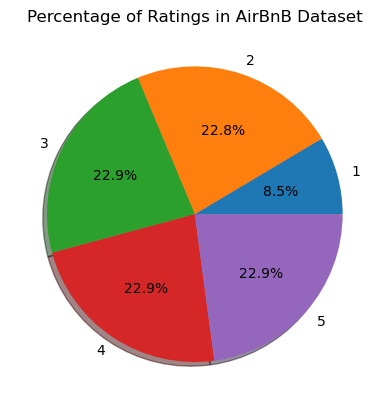

In [29]:
# Visualizing Number of Ratings for Rating Number
# Grouping by rating, count on column, putting data into a list for plotting

rating_group_sl = airbnb_df_sl.groupby(['review rate number'])
rating_gr_bar_sl = rating_group_sl["price"].count()

x = rating_gr_bar_sl.index.to_list()
y = rating_gr_bar_sl.to_list()
plt.pie(y, labels = x, autopct="%1.1f%%", shadow=True)
plt.title("Percentage of Ratings in AirBnB Dataset")
plt.show()